Import library : 

In [ ]:
!pip install datasets
!pip install transformers
from datasets import load_dataset


import re 

# torch library: 
import torch
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

from tqdm.notebook import tqdm


# transformer : 
from transformers import AutoTokenizer, AutoModelForMaskedLM,BertTokenizer
from transformers import BertForSequenceClassification
from transformers import AdamW, get_linear_schedule_with_warmup

# sklearn: 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score,accuracy_score

# pandas : 
import pandas as pd 
# numpy 
import numpy as np 


# matplotlib
import matplotlib.pyplot as plt


     |████████████████████████████████| 342 kB 5.2 MB/s 
     |████████████████████████████████| 212 kB 42.4 MB/s 
     |████████████████████████████████| 136 kB 47.5 MB/s 
     |████████████████████████████████| 1.1 MB 22.0 MB/s 
     |████████████████████████████████| 84 kB 3.2 MB/s 
     |████████████████████████████████| 127 kB 53.4 MB/s 
     |████████████████████████████████| 94 kB 3.3 MB/s 
     |████████████████████████████████| 144 kB 48.5 MB/s 
     |████████████████████████████████| 271 kB 51.8 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
     |████████████████████████████████| 4.0 MB 5.3 MB/s 


Load data set : 

In [ ]:


train_data = pd.read_excel("Dataset/train.xlsx")
test_data = pd.read_excel("Dataset/test.xlsx")
validation_data = pd.read_excel("Dataset/valid.xlsx")



In [ ]:
train_data

,source,targets,category
0,"When news is brought to one of them, of (the b...",و چون یکی از آنان را به [ولادت] دختر مژده دهند...,quran
1,After them repaired Zadok the son of Immer ove...,و چون دشمنان ما شنیدند که ما آگاه شده‌ایم و خد...,bible
2,And establish regular prayers at the two ends ...,و نماز را در دو طرف روز و ساعات نخستین شب برپا...,quran
3,"And it came to pass, that, when I was come aga...",و فرمود تا مدعیانش نزد تو حاضر شوند؛ و از او ب...,bible
4,"Ah woe, that Day, to the Rejecters of Truth!",وای در آن روز بر تکذیب کنندگان!,quran
...,...,...,...
12595,"Women impure are for men impure, and men impur...",زنان پلید برای مردان پلید و مردان پلید برای زن...,quran
12596,I don't want any silly dance given in my honour.',بنابراین حالا هم میل ندارم جشنی به افتخار من د...,mizan
12597,And the Earth will shine with the Glory of its...,و زمین به نور پروردگارش روشن می‌شود، و کتاب [ا...,quran
12598,"Then lifted I up mine eyes, and saw, and behol...",گفتم: «این چیست؟» او جواب داد: «این است آن ایف...,bible


In [ ]:
test_data

,source,targets,category
0,The report will cost you five hundred pounds.,اینکار برای شما ۵۰۰لیره خرج برمی دارد.,mizan
1,"And the cart came into the field of Joshua, a ...",و سموئیل تمامی خاندان اسرائیل را خطاب کرده، گف...,bible
2,"Wherefore thus saith the Holy One of Israel, B...",‌ای بنی‌اسرائیل بسوی آن کس که بر وی بینهایت عص...,bible
3,"For when for the time ye ought to be teachers,...",و این مثلی است برای زمان حاضر که بحسب آن هدایا...,bible
4,Waited for her to turn,منتظر شدم تا بچرخد,mizan
...,...,...,...
2695,And the Spirit of God came upon Saul when he h...,وحال اینک پادشاه پیش روی شما راه می‌رود و من پ...,bible
2696,"If We had made it an angel, We should have sen...",[این مغالطه گران لجوج می‌گویند: چرا پیامبر از ...,quran
2697,"And the Wicked - they will be in the Fire,",و مسلما گناهکاران در دوزخ اند,quran
2698,What was wrong with him then?,مشکلش چیست؟,mizan


In [ ]:
validation_data

,source,targets,category
0,"And there came out a fire from the LORD, and c...",تا برای بنی‌اسرائیل یادگارباشد تا هیچ غریبی که...,bible
1,And out of them shall proceed thanksgiving and...,ویهودا و تمامی شهرهایش با هم و فلاحان و آنانی ...,bible
2,So We sent against them a furious Wind through...,سرانجام تندبادی سخت و سرد در روزهایی شوم بر آن...,quran
3,"""And drink Boiling Water on top of it:",و روی آن از آب جوشان خواهید نوشید،,quran
4,"I was starting to get sleepythough, according ...",داشت خوابم می‌گرفت اگرچه، به گفته‌ی ادوارد نصف...,mizan
...,...,...,...
2695,"And he left the oxen, and ran after Elijah, an...",و اینک نبی‌ای نزد اخاب، پادشاه اسرائیل آمده، گ...,bible
2696,Then which of the favours of your Lord will ye...,پس کدامیک از نعمت‌های پروردگارتان را انکار می‌...,quran
2697,"That was the deal, the price.",آن قرار و عهد ما بود. بهای آن.,mizan
2698,And when we burned incense to the queen of hea...,کلامی که خداوند درباره آمدن نبوکدرصرپادشاه باب...,bible


preprocessing function : 

Preprocessing train, test and validation data : 

In [ ]:

train_data['category'].replace(['bible', 'mizan', 'quran'],[0,1,2], inplace=True)

test_data['category'].replace(['bible', 'mizan', 'quran'],[0,1,2], inplace=True)

validation_data['category'].replace(['bible', 'mizan', 'quran'],[0,1,2], inplace=True)


GPU or CPU " 

In [ ]:

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla K80


Data tokenization : 

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('HooshvareLab/bert-base-parsbert-ner-uncased', do_lower_case=True)
                                          
encoded_data_train = tokenizer.batch_encode_plus(
    list(train_data['targets']), 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=128, 
    return_tensors='pt'
)

encoded_data_val = tokenizer.batch_encode_plus(
    list(validation_data['targets']), 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=128, 
    return_tensors='pt'
)


input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(list(train_data['category']))

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(list(validation_data['category']))

dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)


Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.33k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.16M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
batch_size = 32

dataloader_train = DataLoader(dataset_train, 
                              sampler=RandomSampler(dataset_train), 
                              batch_size=batch_size)

dataloader_validation = DataLoader(dataset_val, 
                                   sampler=SequentialSampler(dataset_val), 
                                   batch_size=batch_size)




Model : 

In [ ]:
num_label = 3 

model = BertForSequenceClassification.from_pretrained('HooshvareLab/bert-base-parsbert-ner-uncased',
                                                      num_labels=num_label,
                                                      output_attentions=False,
                                                      output_hidden_states=False,ignore_mismatched_sizes=True)


model.to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at HooshvareLab/bert-base-parsbert-ner-uncased and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([21, 768]) in the checkpoint and torch.Size([3, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([21]) in the checkpoint and torch.Size([3]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(100000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elemen

set parameter : 

In [ ]:


Epoch = 10
lr=3e-5


optimizer = AdamW(model.parameters(), lr=lr)
                  



/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Training : 

In [ ]:
train_loss = []
train_acc = []
valid_loss = []
valid_acc = []

for epoch in range(Epoch):
  model.train()
  loss_train_total = 0
  acc_train_total = 0  
  Counter_train = 0
  Counter_train_loss = 0 

  for input_ids,attention_mask,labels in dataloader_train:

    Counter_train_loss +=1
    Counter_train+= len(input_ids)
    optimizer.zero_grad()
      


    input_ids = input_ids.to(device)
    attention_mask = attention_mask.to(device)
    labels = labels.to(device)

    loss,y_pred = model(input_ids = input_ids,attention_mask=attention_mask,labels=labels).values()
    pred = torch.log_softmax(y_pred, dim=1).argmax(dim=1)
    
    acc_train_total += torch.sum(pred == labels).item()
    loss_train_total += loss.item()
    loss.backward()


    optimizer.step()

      



  loss_valid_total = 0
  acc_valid_total  = 0 
  Counter_valid = 0 
  Counter_valid_loss = 0 
  model.eval()
  for input_ids,attention_mask,labels in dataloader_validation:
    optimizer.zero_grad()  
    Counter_valid+= len(input_ids)
    Counter_valid_loss+=1 


    input_ids = input_ids.to(device)
    attention_mask = attention_mask.to(device)
    labels = labels.to(device)

    loss,y_pred = model(input_ids = input_ids,attention_mask=attention_mask,labels=labels).values()
    pred = torch.log_softmax(y_pred, dim=1).argmax(dim=1)

    acc_valid_total += torch.sum(pred == labels).item()
    loss_valid_total += loss.item()

  print("Epoch :",epoch+1, " Train loss:", loss_train_total/Counter_train_loss, " Validataion loss:" ,loss_valid_total/Counter_valid_loss,
        "Train accuracy:",acc_train_total/Counter_train,"Validation accuracy:",acc_valid_total/Counter_valid)
  

  train_acc.append(acc_train_total/Counter_train)
  train_loss.append(loss_train_total/Counter_train_loss)

  valid_acc.append(acc_valid_total/Counter_valid)
  valid_loss.append(loss_valid_total/Counter_valid_loss)
  # torch.save(model.state_dict(), f'/content/drive/MyDrive/NlP_CA4/ParsBert/finetuned_BERT_epoch_{epoch}.model')






Epoch : 1  Train loss: 0.18537465138195394  Validataion loss: 0.09007939883672139 Train accuracy: 0.9315873015873016 Validation accuracy: 0.97
Epoch : 2  Train loss: 0.0394399119221941  Validataion loss: 0.0912794741884093 Train accuracy: 0.9872222222222222 Validation accuracy: 0.97
Epoch : 3  Train loss: 0.0161192848378595  Validataion loss: 0.11491499990909634 Train accuracy: 0.9945238095238095 Validation accuracy: 0.9662962962962963
Epoch : 4  Train loss: 0.017138653964665247  Validataion loss: 0.10650063318556503 Train accuracy: 0.9944444444444445 Validation accuracy: 0.97
Epoch : 5  Train loss: 0.004051945375589279  Validataion loss: 0.18284051251693573 Train accuracy: 0.998968253968254 Validation accuracy: 0.96
Epoch : 6  Train loss: 0.00927474519361161  Validataion loss: 0.1113484550950542 Train accuracy: 0.9970634920634921 Validation accuracy: 0.9707407407407408
Epoch : 7  Train loss: 0.004370171092203901  Validataion loss: 0.12493537082473802 Train accuracy: 0.9985714285714286

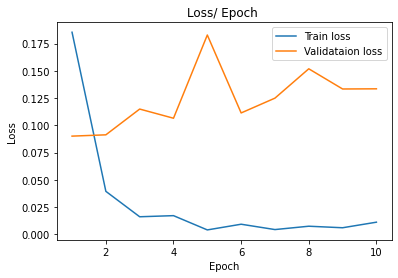

In [ ]:


epoch_list = [i+1 for i in range(Epoch)]
plt.plot(epoch_list,train_loss,label="Train loss")
plt.plot(epoch_list,valid_loss,label="Validataion loss")

plt.ylabel('Loss')
plt.xlabel("Epoch")
plt.title("Loss/ Epoch ")
plt.legend()
plt.show()

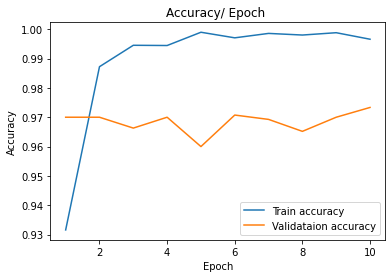

In [ ]:
epoch_list = [i+1 for i in range(Epoch)]
plt.plot(epoch_list,train_acc,label="Train accuracy")
plt.plot(epoch_list,valid_acc,label="Validataion accuracy")

plt.ylabel('Accuracy')
plt.xlabel("Epoch")
plt.title("Accuracy/ Epoch ")
plt.legend()
plt.show()

Test : 

In [ ]:
encoded_data_test = tokenizer.batch_encode_plus(
    list(test_data['targets']), 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=128, 
    return_tensors='pt'
)



input_ids_test = encoded_data_test['input_ids']
attention_masks_test = encoded_data_test['attention_mask']
labels_test = torch.tensor(list(test_data['category']))

dataset_test = TensorDataset(input_ids_test, attention_masks_test, labels_test)



dataloader_test= DataLoader(dataset_test, 
                                   sampler=SequentialSampler(dataset_val), 
                                   batch_size=32)




/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2269: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
test_f1score = 0 
test_Accuracy = 0 
test_auc = 0

prediction = []
grand_truth = []

model.eval()
for input_ids,attention_mask,labels in dataloader_validation:

  optimizer.zero_grad()  

  input_ids = input_ids.to(device)
  attention_mask = attention_mask.to(device)
  labels = labels.to(device)

  loss,y_pred = model(input_ids = input_ids,attention_mask=attention_mask,labels=labels).values()
  pred = torch.log_softmax(y_pred, dim=1).argmax(dim=1)
  prediction +=pred.tolist()
  grand_truth +=labels.tolist()




In [ ]:
from sklearn.metrics import classification_report

print(classification_report(grand_truth, prediction))

test_f1score = f1_score(grand_truth,prediction,average='micro')
test_Accuracy  = accuracy_score(grand_truth,prediction)

fpr, tpr, thresholds = metrics.roc_curve(grand_truth_, prediction_, pos_label=3)
test_auc = metrics.auc(fpr, tpr)


print("Accuracy:", test_Accuracy ," test f1_score :",test_f1score , "test AUC:", test_auc)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       900
           1       0.95      0.98      0.97       900
           2       0.99      0.96      0.98       900

    accuracy                           0.97      2700
   macro avg       0.97      0.97      0.97      2700
weighted avg       0.97      0.97      0.97      2700

Accuracy: 0.9733333333333334  test f1_score : 0.9733333333333334 test AUC: 0.977679012345679


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
